In [128]:
import json

# import sys
# sys.path.append('../../')

from AMBRA_Utils import Api



import ipywidgets as wdg
from IPython.display import display

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
uname_wdg = wdg.Text(placeholder='Username', value='malonetc@ucmail.uc.edu')
pwd_wdg = wdg.Password(placeholder='Password')

login_box = wdg.VBox([uname_wdg, pwd_wdg])
    
display(login_box)

In [221]:
ambra = Api.Api(uname_wdg.value, pwd_wdg.value)

In [222]:
print(ambra)

You are logged in as Thomas Maloney.


In [211]:
aprise = ambra.get_account_by_name('APRISE')

In [212]:
group_vagal = aprise.get_group_by_name('Dr. Vagal')

In [214]:
ap_test_study = group_vagal.get_studies_by_id('460568617')

In [220]:
ap_test_study

[Patient ID: 460568617;
               Modality: CT;
               Study Date: 20170829;
               Created: 2020-09-15 06:40:40.658516-07;
              Description: CT-HEAD W/O,
 Patient ID: 460568617;
               Modality: MR;
               Study Date: 20170809;
               Created: 2020-09-15 06:40:40.647207-07;
              Description: MRI-HEAD W/WO,
 Patient ID: 460568617;
               Modality: CT;
               Study Date: 20170809;
               Created: 2020-09-15 06:40:40.645783-07;
              Description: CT-HEAD W/O_Follow Up,
 Patient ID: 460568617;
               Modality: CT;
               Study Date: 20170822;
               Created: 2020-09-15 06:40:40.634566-07;
              Description: CT-HEAD W/O,
 Patient ID: 460568617;
               Modality: CT;
               Study Date: 20170808;
               Created: 2020-09-15 06:40:40.633931-07;
              Description: CT HEAD WO_CT ANGIO HEAD-NECK_BASELINE]

In [131]:
account = ambra.get_account_by_name('ROSE')

In [132]:
groups = account.get_groups()

In [133]:
groups[0]

Site 21 - University of Cincinnati

In [134]:
group = Api.Group( ambra, groups[0])

In [135]:
print(group)

Site 21 - University of Cincinnati


In [136]:
studies = group.get_studies()

In [137]:
print(account)

ROSE


In [138]:
account.get_groups()

[Site 21 - University of Cincinnati,
 Site 22 - University of Maryland,
 Site 23 - MGH,
 Site 24 - Duke University,
 Site 25 - Columbia University,
 Site 26 - UIC,
 All Approved Studies,
 UC Scanners / PACS Studies,
 Site 27 - Baptist Health Louisville]

In [139]:
uc_group = account.get_group_by_name('Site 21 - University of Cincinnati')

In [140]:
print(uc_group)
print(uc_group.study_count())

Site 21 - University of Cincinnati
287


In [141]:
account.counts_by_group()

{'Site 21 - University of Cincinnati': 287,
 'Site 22 - University of Maryland': 104,
 'Site 23 - MGH': 25,
 'Site 24 - Duke University': 30,
 'Site 25 - Columbia University': 11,
 'Site 26 - UIC': 10,
 'All Approved Studies': 451,
 'UC Scanners / PACS Studies': 132,
 'Site 27 - Baptist Health Louisville': 2}

In [142]:
account.counts_by_location()

{'Rejected Studies': 5, 'Clinical': 420, 'DTI': 420, 'Volumetric': 420}

In [143]:
studies = uc_group.get_studies_by_id('21-394546')

In [144]:
this_study = studies[1]

In [145]:
this_study

Patient ID: 21-394546;
              Modality: CT;
              Study Date: 20171106;
              Description: 

In [207]:
this_study.created

'2019-09-16 15:21:07.259031-07'

In [210]:
this_study.study_date

'20171106'

In [146]:
# this_dict = this_study.to_dict()

# non_key_args = ['_api', '_schema', 'logger', '__class__']

# for non_key_arg in non_key_args:
#     _ = this_dict.pop(non_key_arg)
#     
# json.dumps(this_dict)

In [148]:
this_study.toJson()

'{"patient_age": "", "star": 0, "radreports": [], "study_status_tags": ["Ready to be Read", "Completed"], "patient_institution_residence": null, "patient_size": null, "patient_birth_time": null, "created": "2019-09-16 15:21:07.259031-07", "must_approve": 0, "phantom": 0, "attachment_count": 0, "source": "upload", "phi_namespace": "74c3e511-2dcd-4c49-9e83-863094fc84fa", "is_frozen": 0, "hl7": [], "engine_fqdn": "storelpp45.dicomgrid.com", "patient_comments": "Clinical Sequences", "size": "107437066", "local_storage_vm": null, "is_dicom_wrapped": 0, "is_being_retrieved": 0, "patient_ethnic_group": "", "study_date": "20171106", "patient_birthname": null, "phi_namespace_name": "Site 21 - University of Cincinnati", "patient_additional_history": null, "patient_sex": "", "study_status": null, "customfields": [{"options": "{\\"values\\":[\\"\\"],\\"show_when\\":{},\\"validate\\":\\"\\",\\"validate_error\\":\\"\\",\\"hint\\":\\"\\",\\"max_length\\":\\"\\",\\"field_label\\":\\"\\",\\"admin_only\

In [149]:
series = this_study.get_series()

In [150]:
# for key in series[0].keys():
#     print(key, series[0][key])

In [152]:
for this_series in series:
    print(this_series.description, this_series.count)

 1
 44
 44
 57
 39
 1
 1


In [153]:
this_series = series[2]

In [154]:
this_series.count

44

In [70]:
this_series.images[43]#.version

<Box: {'id': '1.2.276.0.7230010.3.1.4.1143195769.2164.1517336141.2053', 'version': 'b7riLYu1BaH-OWGYD_18hRRnplM', 'rank': 44, 'frame_count': 1, 'sop_class': '1.2.840.10008.5.1.4.1.1.2', 'transfer_syntax': '1.2.840.10008.1.2.1'}>

In [121]:
engine = this_series.study.engine_fqdn
namespace = this_series.study.storage_namespace
study_uid = this_series.study.study_uid
phi_namespace = this_series.study.phi_namespace

image_number = 25
image_uid = this_series.images[image_number].id
image_version = this_series.images[image_number].version

# How do I find if the dicom has an encapsulated pdf??
#this = this_series._api.Storage.Study.pdf(engine_fqdn=engine, namespace=namespace, study_uid=study_uid, image_uid=image_uid,image_version=image_version)

this = this_series._api.Storage.Study.thumbnail(frame_number = 0, engine_fqdn=engine, namespace=namespace, study_uid=study_uid, image_uid=image_uid,image_version=image_version)

#this = this_series._api.Storage.Study.tag(engine_fqdn=engine, namespace=namespace, study_uid=study_uid, phi_namespace=phi_namespace)



In [124]:
from IPython.display import Image, display

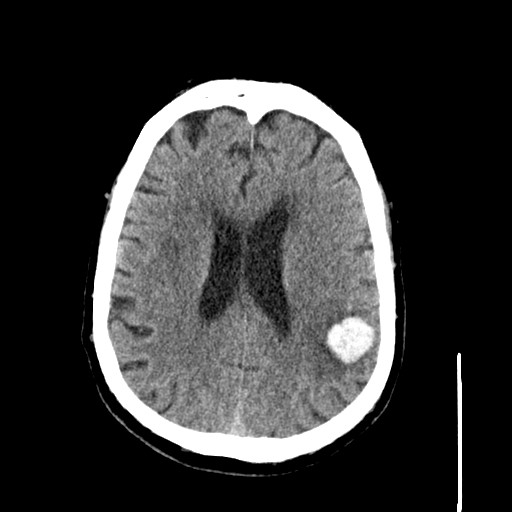

In [177]:
display(Image(data=this_series.get_frame(27), width=200))

In [200]:
these_tags = this_series.get_tags(0)

for tag in these_tags['tags']:
    print(f'{tag.name} -- {tag.value}')

File Meta Information Version -- Binary Data
Media Storage SOP Class UID -- 1.2.840.10008.5.1.4.1.1.2
Media Storage SOP Instance UID -- 1.3.12.2.1107.5.1.4.54589.30000017110614250426500002497
Transfer Syntax UID -- 1.2.840.10008.1.2.1
Implementation Class UID -- 1.2.276.0.7230010.3.0.3.6.0
Implementation Version Name -- NAUTILUS_V4
Source Application Entity Title -- GEPACS
Specific Character Set -- ISO_IR 100
Image Type -- ORIGINAL\PRIMARY\AXIAL\CT_SOM5 SPI
SOP Class UID -- 1.2.840.10008.5.1.4.1.1.2
SOP Instance UID -- 1.2.276.0.7230010.3.1.4.1143195769.2164.1517336141.1951
Study Date -- 20171106
Series Date -- 20171106
Acquisition Date -- 20171106
Content Date -- 
Study Time -- 145358.906000
Series Time -- 145558.984000
Acquisition Time -- 145455.487711
Content Time -- 145455.487711
Accession Number -- 
Modality -- CT
Manufacturer -- SIEMENS
Institution Name -- 
Institution Address -- 
Referring Physician’s Name -- 
Station Name -- 
Study Description -- 
Procedure Code Sequence -- Seq

In [78]:
this_storage = this_series._api.Storage

In [ ]:
this_storage.Study.json()

# Downloading data

In [ ]:
#series[0].download('test1.zip')

In [ ]:
#series[1].download('test2.zip')

In [ ]:
#this_study.download('test_all.zip')

In [ ]:
#import zipfile

#this_zip = zipfile.ZipFile('test_all.zip', mode='r')

In [ ]:
#this_zip.printdir()

# DICOM Tags

In [183]:
these_tags = this_study.get_tags_json()

In [194]:
import pandas as pd
from io import StringIO

In [196]:
pd.read_csv(StringIO(these_tags[0]['tags'].to_csv()))

,name,group,element,vr,vl,initialTagValue,simpleValue,value,items
0,File Meta Information Version,2,1,OB,2,131073,Binary Data,Binary Data,NaN
1,Media Storage SOP Class UID,2,2,UI,26,131074,1.2.840.10008.5.1.4.1.1.2,1.2.840.10008.5.1.4.1.1.2,NaN
2,Media Storage SOP Instance UID,2,3,UI,56,131075,1.3.12.2.1107.5.1.4.54589.30000017110611154951...,1.3.12.2.1107.5.1.4.54589.30000017110611154951...,NaN
3,Transfer Syntax UID,2,16,UI,20,131088,1.2.840.10008.1.2.1,1.2.840.10008.1.2.1,NaN
4,Implementation Class UID,2,18,UI,28,131090,1.2.276.0.7230010.3.0.3.6.0,1.2.276.0.7230010.3.0.3.6.0,NaN
...,...,...,...,...,...,...,...,...,...
116,?,2307,4114,US,2,151195666,0,0,NaN
117,Private Creator Data Element,2309,16,LO,6,151322640,GEIIS,GEIIS,NaN
118,?,2309,4144,LO,2,151326768,NaN,NaN,NaN
119,Private Creator Data Element,32721,16,LO,6,2144403472,GEIIS,GEIIS,NaN


In [197]:
len(these_tags)

187

In [ ]:
# prints all the dicom tags and values in the first slice
#json[0]


# Reports


In [ ]:
this_study.phi_namespace_name

In [ ]:
from datetime import datetime

In [ ]:
min_date = datetime(2020, 11, 1)

In [ ]:
isinstance(min_date, datetime)